In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import ffn
%matplotlib inline
plt.style.use('dark_background')


In [2]:
prices = pd.read_csv("../data/stock.csv", index_col=0)

In [26]:
length = range(50,200)
Risk_Table = pd.DataFrame(columns=prices.columns)

for l in length:
    test = prices.iloc[-l:].rebase()
    Dnext = test[ 1:].reset_index(drop=True)
    Dthis = test[:-1].reset_index(drop=True)
    Risk_each_day = (Dnext - Dthis)**2
    Risk_square = Risk_each_day.sum(axis=0)/test.shape[0]
    Risk = Risk_square**(1/2)
    Risk.name = f"{l}"
    Risk_Table = pd.concat([Risk_Table, Risk.to_frame().T])
print(Risk_Table)

         meta      goog      amzn      nflx      aapl
50   4.455577  2.707986  2.766887  4.741400  2.649172
51   4.271049  2.636764  2.693102  4.485369  2.578538
52   4.232530  2.611800  2.653794  4.507887  2.538367
53   4.155509  2.582369  2.625648  4.396739  2.519627
54   4.169678  2.672673  2.786182  4.387883  2.583782
..        ...       ...       ...       ...       ...
195  3.379043  2.094079  2.633022  3.606002  2.264434
196  3.251109  2.057426  2.603927  3.446721  2.211253
197  3.191285  2.035023  2.764913  3.418841  2.154395
198  3.334681  2.166390  2.829262  3.597599  2.238019
199  3.378010  2.175327  2.793595  3.505686  2.207876

[150 rows x 5 columns]


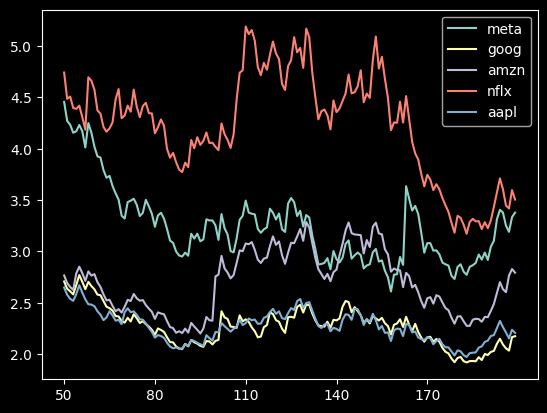

In [27]:
ax = sns.lineplot(Risk_Table, dashes=False)
price_len = len(Risk_Table.index)
step = 5
x_tick = range(0, price_len, price_len//step)
ax.set_xticks(x_tick, labels=Risk_Table.index[x_tick])

plt.savefig("../src/trend/risk.png", transparent=True)